In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import scipy.optimize as sco
import scipy.interpolate as sci
import matplotlib.pyplot as plt


In [2]:
# create a list of symbols
symbols = [
    "XLY", "XLI", "XLE", "XLK", "XLF", "XLV",
    "XLU", "XLB"
]

# instantiate data frame container
asset_data = pd.DataFrame()

# for loop to get data from yahoo finance
for sym in symbols:
    # each run of the loop returns a pandas dataframe
    asset_data[sym] = web.DataReader(
        name = sym,
        data_source = 'yahoo',
        start = '2020-03-20',
        end = '2022-03-07'
        )['Adj Close'] # use [] to extract values as pandas series

# set column indicies
asset_data.columns = symbols

# examine the first 5 rows
print(asset_data.head(n = 5))

                   XLY        XLI        XLE        XLK        XLF        XLV  \
Date                                                                            
2020-03-20   86.311852  49.712013  23.163046  69.999710  18.112066  76.609550   
2020-03-23   86.454102  47.534599  21.584288  69.360291  17.058243  72.630547   
2020-03-24   94.563194  53.548313  25.045832  76.463821  19.173622  78.227249   
2020-03-25   96.222527  56.365108  26.227152  76.365295  19.695217  79.268730   
2020-03-26  100.202988  59.922642  27.829718  81.094398  20.931606  84.534485   

                  XLU        XLB  
Date                              
2020-03-20  44.774574  39.093388  
2020-03-23  42.489792  37.100506  
2020-03-24  47.057468  41.463558  
2020-03-25  48.258492  42.430981  
2020-03-26  52.372242  44.423859  


In [3]:
# compute daily simple returns
daily_returns = (
    asset_data.pct_change()
        .dropna(
            #drop the first row since we have NaN's
            # the first date 2011-09-13 does not have a vlaue since it is our cut off date
            axis = 0,
            how = 'any',
            inplace = False
            )
)

# examine the last 5 rows 
daily_returns.tail(n=5)

,XLY,XLI,XLE,XLK,XLF,XLV,XLU,XLB
Date,,,,,,,,
2022-03-01,-0.015161,-0.014916,0.010059,-0.019991,-0.036864,-0.005540,-0.008685,-0.023027
2022-03-02,0.021003,0.021341,0.022864,0.021657,0.025876,0.015088,0.012177,0.021974
2022-03-03,-0.022645,0.001095,0.002743,-0.011928,-0.003153,0.005107,0.017606,0.001201
2022-03-04,-0.015886,-0.002187,0.028857,-0.017517,-0.018714,0.005005,0.022059,-0.003479
2022-03-07,-0.049009,-0.026796,0.014755,-0.036594,-0.036530,-0.017431,0.012978,-0.034674


In [ ]:
#                              ETF ANALYSIS                               #

<Figure size 1152x720 with 0 Axes>

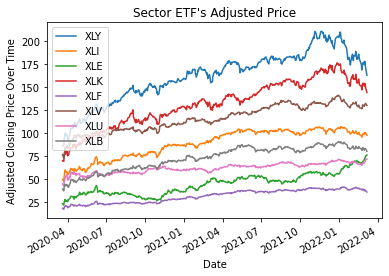

In [39]:
# plot closing prices

plt.figure(figsize=(16,10))
asset_data.plot()
plt.ylabel("Adjusted Closing Price Over Time")
plt.xlabel("Date")
plt.title("Sector ETF's Adjusted Price")
plt.show()

In [35]:
# computing cumulative returns

cum_daily_returns = (1 + daily_returns).cumprod() - 1
print(cum_daily_returns)

                 XLY       XLI       XLE       XLK       XLF       XLV  \
Date                                                                     
2020-03-23  0.001648 -0.043801 -0.068158 -0.009135 -0.058184 -0.051939   
2020-03-24  0.095599  0.077170  0.081284  0.092345  0.058610  0.021116   
2020-03-25  0.114824  0.133833  0.132284  0.090937  0.087409  0.034711   
2020-03-26  0.160941  0.205396  0.201471  0.158496  0.155672  0.103446   
2020-03-27  0.122034  0.154615  0.120028  0.106138  0.120474  0.079814   
...              ...       ...       ...       ...       ...       ...   
2022-03-01  1.024519  0.979401  2.077747  1.157009  1.048358  0.686996   
2022-03-02  1.067039  1.021644  2.148118  1.203723  1.101362  0.712450   
2022-03-03  1.020232  1.023857  2.156752  1.177438  1.094736  0.721195   
2022-03-04  0.988140  1.019431  2.247846  1.139295  1.055536  0.729810   
2022-03-07  0.890702  0.965320  2.295767  1.061009  0.980448  0.699658   

                 XLU       XLB  
Date

<Figure size 1152x720 with 0 Axes>

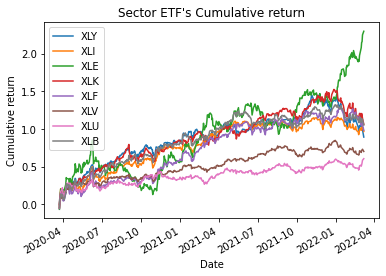

In [40]:
# plot the cumulative returns

plt.figure(figsize=(16,10))
cum_daily_returns.plot()
plt.ylabel("Cumulative return")
plt.xlabel("Date")
plt.title("Sector ETF's Cumulative return")
plt.show()

XLU    0.268334
XLV    0.288735
XLY    0.353851
XLI    0.376403
XLF    0.390035
XLB    0.399036
XLK    0.404456
XLE    0.694355
dtype: float64


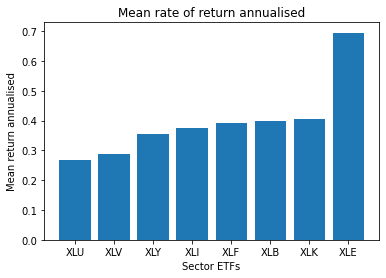

In [59]:
# find mean daily returns and annualise it
etf_mean_returns = (daily_returns.mean() * 253)

# sort values
etf_mean_returns = etf_mean_returns.sort_values()
print(etf_mean_returns)
# daily mean index for x axis
etf_mean_returns.keys()

# grab each daily mean value for the y axis
height = []
for key in etf_mean_returns.keys():
    height.append(etf_mean_returns[key])

# arrange keys on x acis based on length
x_pos = np.arange(len(etf_mean_returns.keys()))

# plot bar chart
plt.bar(x_pos, height)
plt.xticks(x_pos, etf_mean_returns.keys())
plt.xlabel("Sector ETFs")
plt.ylabel("Mean return annualised")
plt.title("Mean rate of return annualised")

plt.show()

XLV    0.184842
XLU    0.230892
XLY    0.235011
XLI    0.247325
XLB    0.249766
XLK    0.261020
XLF    0.283816
XLE    0.410794
dtype: float64


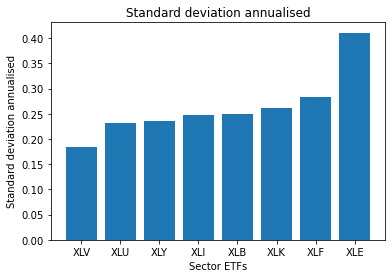

In [60]:
# find mean daily returns and annualise it
etf_cov = (daily_returns.var() * 253)

# sort values and calcaulate standard deviation
etf_sd = np.sqrt(etf_cov.sort_values())
print(etf_sd)
# daily mean index for x axis
etf_sd.keys()

# grab each daily mean value for the y axis
height = []
for key in etf_sd.keys():
    height.append(etf_sd[key])

# arrange keys on x acis based on length
x_pos = np.arange(len(etf_sd.keys()))

# plot bar chart
plt.bar(x_pos, height)
plt.xticks(x_pos, etf_sd.keys())
plt.xlabel("Sector ETFs")
plt.ylabel("Standard deviation annualised")
plt.title("Standard deviation annualised")

plt.show()

In [4]:
print(daily_returns.mean() * 253)

XLY    0.353851
XLI    0.376403
XLE    0.694355
XLK    0.404456
XLF    0.390035
XLV    0.288735
XLU    0.268334
XLB    0.399036
dtype: float64


In [53]:
print(daily_returns.var()*253)

XLY    0.055230
XLI    0.061170
XLE    0.168752
XLK    0.068131
XLF    0.080551
XLV    0.034167
XLU    0.053311
XLB    0.062383
dtype: float64


In [5]:
print(daily_returns.cov() * 253)

          XLY       XLI       XLE       XLK       XLF       XLV       XLU  \
XLY  0.055230  0.042555  0.045016  0.051481  0.044149  0.027381  0.028033   
XLI  0.042555  0.061170  0.074370  0.039774  0.062665  0.030854  0.037426   
XLE  0.045016  0.074370  0.168752  0.039286  0.089285  0.033513  0.039556   
XLK  0.051481  0.039774  0.039286  0.068131  0.039663  0.034377  0.029414   
XLF  0.044149  0.062665  0.089285  0.039663  0.080551  0.031817  0.039108   
XLV  0.027381  0.030854  0.033513  0.034377  0.031817  0.034167  0.028395   
XLU  0.028033  0.037426  0.039556  0.029414  0.039108  0.028395  0.053311   
XLB  0.041814  0.055332  0.070456  0.040813  0.059797  0.031506  0.036338   

          XLB  
XLY  0.041814  
XLI  0.055332  
XLE  0.070456  
XLK  0.040813  
XLF  0.059797  
XLV  0.031506  
XLU  0.036338  
XLB  0.062383  


In [6]:
# Function for computing portfolio return
def portfolio_returns(weights):
    return (np.sum(daily_returns.mean() * weights)) * 253

# function for computing standard deviation of portfolio returns
def portfolio_sd(weights):
    return np.sqrt(np.transpose(weights) @ (daily_returns.cov() * 253) @ weights)


In [7]:
# instantiate empy list containers for returns and sd

list_portfolio_returns = []
list_portfolio_sd = []

# loop to simulate 5000 random weight vectors (numpy array objects)
for p in range(5000):
    # return random floats in the half open interval [0.0, 1.0]
    weights = np.random.random(size = len(symbols))
    # normalize to unity
    # the /= operator divides the array by the sum of the array and rebinds "weights" to the new object
    weights /= np.sum(weights)
    # lists are mutable so growing will not be memory inefficient
    list_portfolio_returns.append(portfolio_returns(weights))
    list_portfolio_sd.append(portfolio_sd(weights))
    # convert list to numpy arrays
    port_returns = np.array(object = list_portfolio_returns)
    port_sd = np.array(object = list_portfolio_sd)

# max expected return
max_expected_return = round(max(port_returns), 4)
print(max_expected_return)

# min expected return
min_expected_return = round(min(port_returns), 4)
print(min_expected_return)

0.5128
0.329


In [9]:
# max sd 
max_expected_sd = round(max(port_sd), 4)
print(max_expected_sd)

# min sd
min_expected_sd = round(min(port_sd), 4)
print(min_expected_sd)

0.2796
0.1925


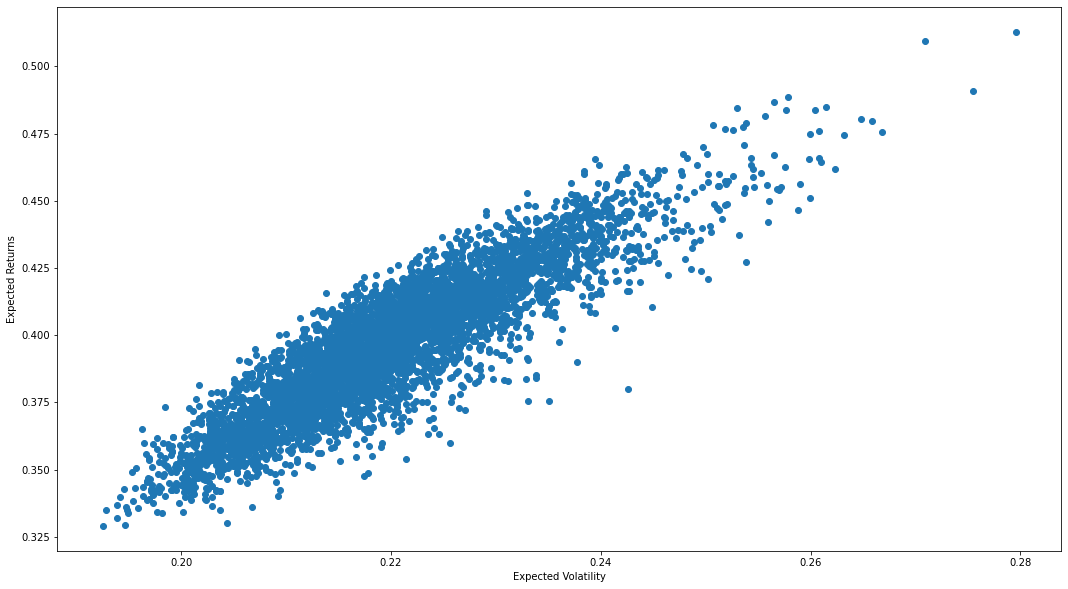

In [10]:
# Plot the sub-optimal portfolios
plt.figure(figsize=(18,10))
plt.scatter(port_sd, port_returns) # c = sharpRatio makes a color map of where the high sharpe ratio is
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.show()

In [11]:
# user defined sharpe ratio function
# negative sign t ocompute the negative value of sharpe ratio

def sharpe_fun(weights):
    return - (portfolio_returns(weights) / portfolio_sd(weights))

In [12]:
# we will use dictionaires inside of a tuple to represent the constraints:
# we use an anonymous lambda function

constraints = ({'type': 'eq', 'fun': lambda x : np.sum(x) - 1})

In [13]:
# next, the bound values for the weights:
# this creates 12 tuples of (0,1), all of twhich exist within a container typle
# we essentially create a sequence of (min, max) pairs

bounds = tuple(
    (0, 1) for w in weights
)

In [14]:
# we also need to supply a starting list of weights, which essentially functions as an initial guess.
# for our purposes this will be an equal weight array:
# repeat the list with the value (1/12) 12 times, and convert list to array

equal_weights = np.array(
    [1 / len(symbols)] * len(symbols)
)

In [15]:
# minimization results
max_sharpe_results = sco.minimize(
    # objective function
    fun = sharpe_fun,
    # initial guess, which is the equal weight array
    x0 = equal_weights,
    method = 'SLSQP',
    bounds = bounds,
    constraints = constraints
)

In [16]:
# extract the weight composition array
print(max_sharpe_results["x"])

[1.34126572e-16 4.83485241e-17 3.42375774e-01 3.43343051e-01
 0.00000000e+00 3.14281175e-01 9.40113391e-17 0.00000000e+00]


In [17]:
# expected return
max_sharpe_port_return = portfolio_returns(max_sharpe_results["x"])
round(max_sharpe_port_return, 4)

0.4673

In [18]:
# standard deviation
max_sharpe_port_sd = portfolio_sd(max_sharpe_results["x"])
round(max_sharpe_port_sd, 4)

0.2346

In [19]:
# sharpe ratio
max_sharpe_port_sharpe = max_sharpe_port_return / max_sharpe_port_sd
round(max_sharpe_port_sharpe, 4)

1.9918

In [20]:
#                                                minimum variance portfolio 

In [21]:
# minimize sd
min_sd_results = sco.minimize(
    # objective function
    fun = portfolio_sd,
    # iniital guess, which is the equal weight array
    x0 = equal_weights,
    method = 'SLSQP',
    bounds = bounds,
    constraints = constraints
)

In [22]:
# expected return
min_sd_port_return = portfolio_returns(min_sd_results["x"])
round(min_sd_port_return, 4)

0.2969

In [23]:
# standard deviation 
min_sd_port_sd = portfolio_sd(min_sd_results["x"])
round(min_sd_port_sd, 4)

0.1793

In [24]:
# sharpe ratio 
min_sd_port_sharpe = min_sd_port_return / min_sd_port_sd
round(min_sd_port_sharpe, 4)

1.6558

In [25]:
#                                         efficient frontier

In [26]:
# For the optimization, we essentially “fit” the twin-objective described earlier into an optimization problem 
# that can be solved using quadratic programming. (The objective function is the portfolio standard deviation 
# formula, which is a quadratic function) Therefore, the two linear constraints are the target return (a linear 
# function) and that the weights must sum to 1 (another linear function). We will again use dictionaries inside 
# of a tuple to represent the constraints:

# we use anonymous lambda functions
# the argument x will be the weights
constraints = (
    {'type': 'eq', 'fun': lambda x: portfolio_returns(x) - target},
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
)

In [27]:
# this creates 12 tuples of (0, 1), all of which exist within a container tuple
# we essentially create a sequence of (min, max) pairs

bounds = tuple(
    (0, 1) for w in weights
)

In [28]:
# in itialise an array of target returns

target = np.linspace(
    start = 0.25,
    stop = 0.75,
    num = 100
)

# instantiate empty container for the objective values to be minimized
obj_sd = []
# for loop to minimize objective function
for target in target:
    min_result_object = sco.minimize(
        # objective function
        fun = portfolio_sd,
        # initial guess, which is the equal weight array
        x0 = equal_weights,
        method = 'SLSQP',
        bounds = bounds,
        constraints = constraints
        )
    # extract the objective value and append it to the output container
    obj_sd.append(min_result_object['fun'])
# end of loop
# convert list to array
obj_sd = np.array(obj_sd)

# rebind target to a new array object
target = np.linspace(
    start = 0.25,
    stop = 0.75,
    num = 100
)

In [29]:
# plt.figure(figsize=(18,10))
# plt.scatter(expectedVolatality, expectedReturn, c=sharpRatio) # c = sharpRatio makes a color map of where the high sharpe ratio is
# plt.xlabel('Expected Volatility')
# plt.ylabel('Expected Returns')
# plt.colorbar(label = 'Sharpe Ratio') # legend for the color map
# plt.scatter(expectedVolatality[maxIndex], expectedReturn[maxIndex], c ='red') # plotting the max sharpe ratio point
# plt.scatter(x_values, y_values, marker = 'X', color = 'orange')
# plt.plot(annualised_volatility_opt, returns)
# plt.show()

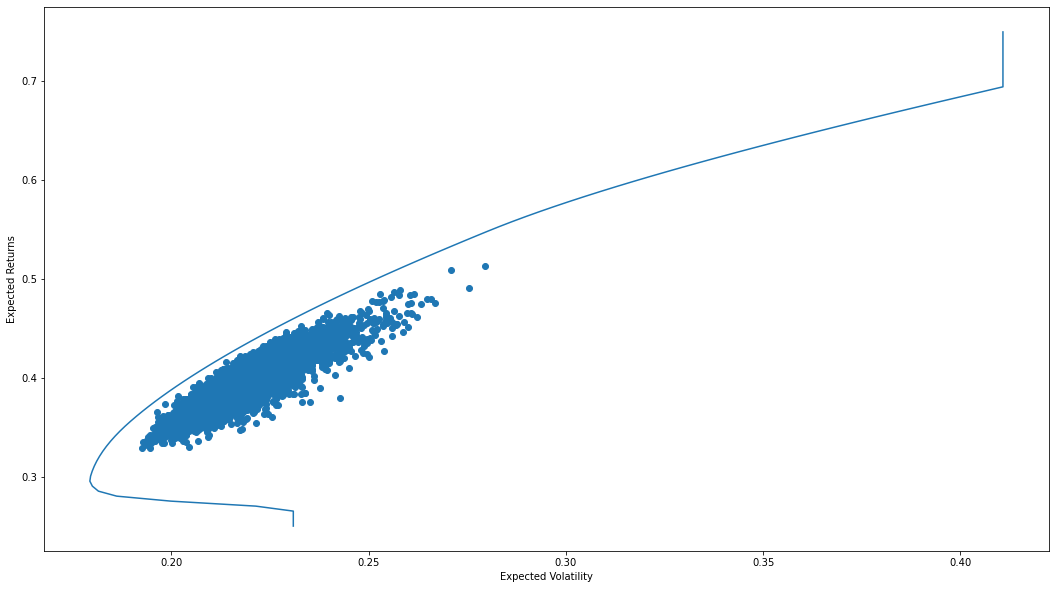

In [30]:
# Plot the sub-optimal portfolios
plt.figure(figsize=(18,10))
plt.scatter(port_sd, port_returns) # c = sharpRatio makes a color map of where the high sharpe ratio is
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.plot(obj_sd, target)
plt.show()

In [31]:
print(obj_sd)
print(target)

# first convert to list
list_obj_sd = obj_sd.tolist()
list_target = target.tolist()
print(list_obj_sd)

# then round to 2dp for searchability
# if you dont do this you wont be able to search for anything
# e.g list_target.index(0.41666667)
# returns ValueError: 0.41666667 is not in list

list_obj_sd = [float('%.2f'% x) for x in list_obj_sd]
print(list_obj_sd)
list_target = [float("%.2f"% x) for x in target]
print(list_target)
print(type(list_obj_sd[1]))

# then find index of your target return
target_index = list_target.index(0.5)
print(target_index)
print(list_obj_sd[target_index])
print(list_target[target_index])
print(obj_sd[target_index])
print(target[target_index])

[0.23089207 0.23089207 0.23089207 0.23089207 0.22137368 0.19985408
 0.18611394 0.18148167 0.17995445 0.17931562 0.17949783 0.17991
 0.18042801 0.18105045 0.1817791  0.18260551 0.18353417 0.18456361
 0.18569014 0.18691311 0.18823006 0.18963731 0.19111481 0.19265562
 0.19425791 0.19592085 0.19764293 0.19942173 0.20125653 0.20314592
 0.20508798 0.20708053 0.20912362 0.21121476 0.21335332 0.2155369
 0.21776683 0.22003975 0.22236082 0.22471863 0.22711794 0.2295595
 0.2320428  0.23455765 0.23711058 0.23970899 0.24235128 0.24503486
 0.24775661 0.25051489 0.25331316 0.25614478 0.25901099 0.26191058
 0.2648425  0.26780601 0.2708005  0.27382206 0.27687288 0.279951
 0.28310186 0.28638551 0.28979778 0.29333418 0.29699029 0.30076174
 0.30464424 0.30863361 0.31272575 0.31691668 0.32120253 0.32557956
 0.33004414 0.33459277 0.33922205 0.34392875 0.34870972 0.35356194
 0.35848253 0.36346871 0.36851782 0.3736273  0.37879472 0.38401773
 0.38929409 0.39462167 0.39999842 0.40542239 0.41079404 0.41079404
 0